# Brain Tumor Detection CNN Model

### IMPORTING LIBRARIES

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

### Adding Dataset


In [ ]:
dataset_path = "/kaggle/input/209data-processed"

train_dir = os.path.join(dataset_path, "/kaggle/input/209data-processed/Processed/Training")
test_dir = os.path.join(dataset_path, "/kaggle/input/209data-processed/Processed/Testing")

categories = ["glioma", "meningioma", "notumor", "pituitary"]

### STEP 3: Loading Dataset and Preprocess, and Basic Setting


In [ ]:
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

image_size = (150, 150)
batch_size = 32
epochs = 50

### STEP 4: Data Augmentation and Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### Build Model (Sequential) and Model Training

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/50
178/178 [==============================] - 201s 1s/step - loss: 0.9504 - accuracy: 0.5842 - val_loss: 1.3092 - val_accuracy: 0.5648
Epoch 2/50
178/178 [==============================] - 187s 1s/step - loss: 0.7035 - accuracy: 0.7246 - val_loss: 1.0805 - val_accuracy: 0.6219
Epoch 3/50
178/178 [==============================] - 188s 1s/step - loss: 0.6149 - accuracy: 0.7639 - val_loss: 0.7676 - val_accuracy: 0.6992
Epoch 4/50
178/178 [==============================] - 190s 1s/step - loss: 0.5427 - accuracy: 0.7940 - val_loss: 0.7356 - val_accuracy: 0.7445
Epoch 5/50
178/178 [==============================] - 190s 1s/step - loss: 0.4914 - accuracy: 0.8153 - val_loss: 0.5625 - val_accuracy: 0.7922
Epoch 6/50
178/178 [==============================] - 190s 1s/step - loss: 0.4825 - accuracy: 0.8173 - val_loss: 0.4896 - val_accuracy: 0.7953
Epoch 7/50
178/178 [==============================] - 191s 1s/step - loss: 0.4160 - accuracy: 0.8463 - val_loss: 0.4348 - val_accuracy: 0.8297

### Performance Analysis

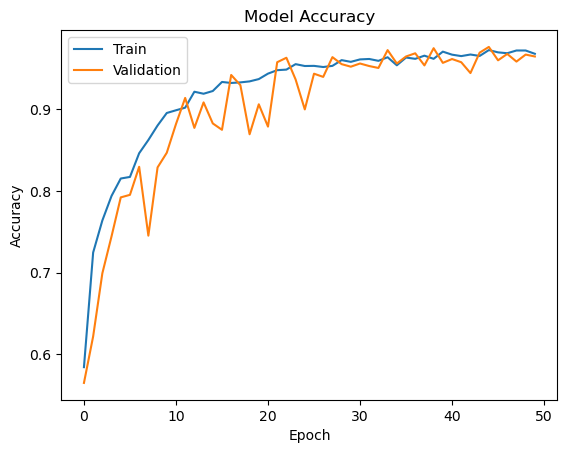

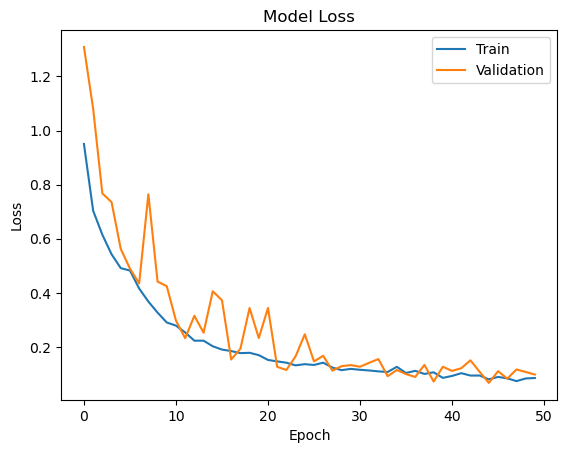

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

41/41 [==============================] - 12s 284ms/step


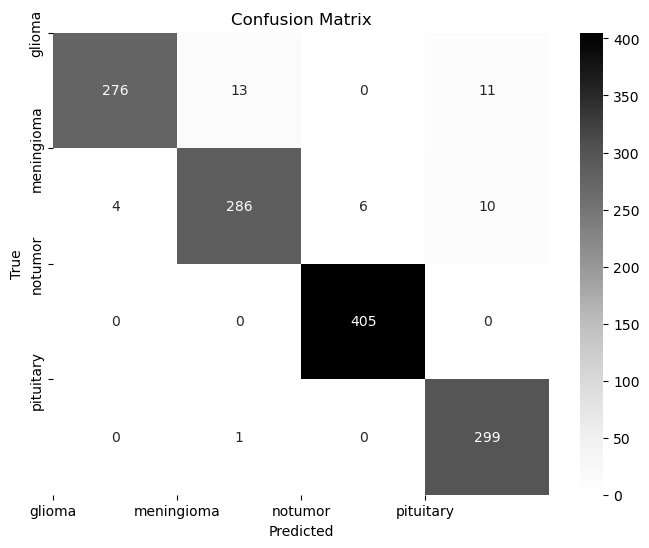

In [ ]:
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Greys")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

In [ ]:
cm = confusion_matrix.numpy()
labels = ["glioma", "meningioma", "notumor", "pituitary"]

accuracies = {}
total_correct_predictions = 0
total_predictions = 0

for i, label in enumerate(labels):
    correct_predictions = cm[i, i]
    total_class_predictions = np.sum(cm[i, :])
    accuracy = correct_predictions / total_class_predictions
    accuracies[label] = accuracy
    total_correct_predictions += correct_predictions
    total_predictions += total_class_predictions

print("Accuracy for each category:")
for category, acc in accuracies.items():
    print(f"{category}: {acc:.2f}")

overall_accuracy = total_correct_predictions / total_predictions
print(f"Overall Average Accuracy: {overall_accuracy:.2f}")

Accuracy for each category:
glioma: 0.92
meningioma: 0.93
notumor: 1.00
pituitary: 1.00
Overall Average Accuracy: 0.97


In [ ]:
model.save("brain_tumor_detection_cnnmodel1_2.h5")